In this section, we will perform the following steps:

1. Load the training (train.csv) and testing (test.csv) datasets into Pandas DataFrames for further processing.
2. Inspect the basic structure of the datasets, including data types, column names, and the presence of missing values.
3. Perform an Exploratory Data Analysis (EDA) to:
- Identify any missing or inconsistent data.
- Explore the distribution of key features like Engine Capacity, Fuel Consumption, and CO2 Emissions.
- Visualize relationships between features and target variables (CO2 Emissions and CO2 Emissions Level) to gain insights into potential predictors.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data_path = 'train.csv'
test_data_path = 'test.csv'

# Load train and test datasets
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display basic information about the datasets
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# Check for missing values
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical Summary of Train Dataset:")
print(train_df.describe())
print("\nStatistical Summary of Test Dataset:")
print(test_df.describe())


Missing Values in Train Dataset:
Manufacturer                                       0
Machine Model                                      0
Machinery Category                                 0
Engine Capacity (L)                                0
Engine Cylinders                                   0
Transmission Type                                  0
Fuel Category                                      0
Fuel Consumption (Load Condition) (L/100 hr)       0
Fuel Consumption (No-Load Condition) (L/100 hr)    0
Average Fuel Consumption (L/100 hr)                0
Average Fuel Efficiency (hrg)                      0
CO2 Emissions (g/hr)                               0
CO2 Emissions Level                                0
dtype: int64

Missing Values in Test Dataset:
Manufacturer                                       0
Machine Model                                      0
Machinery Category                                 0
Engine Capacity (L)                                0
Engine Cylinders   

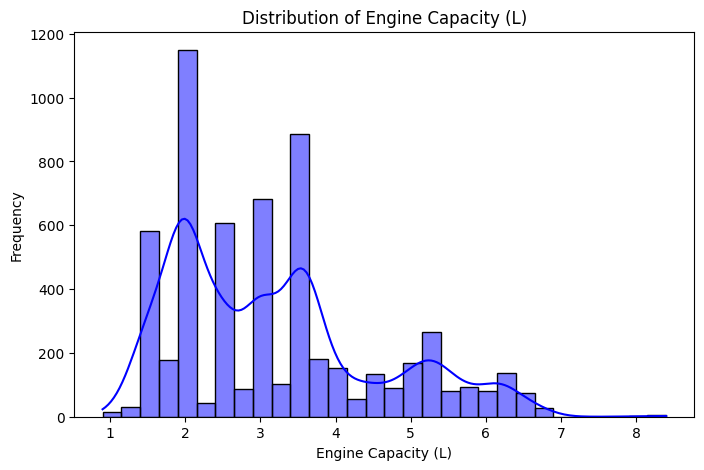

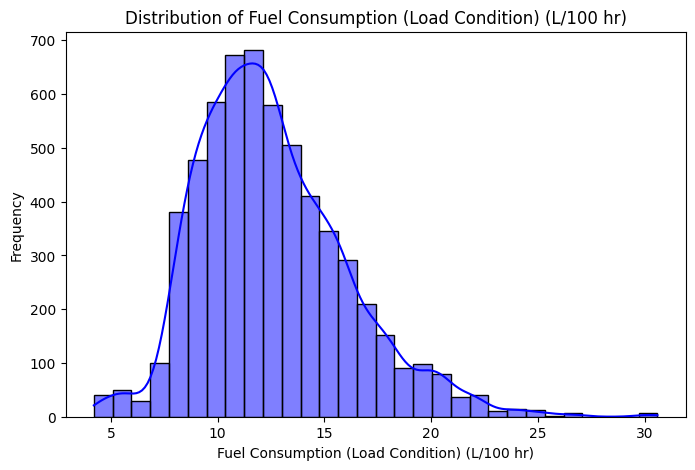

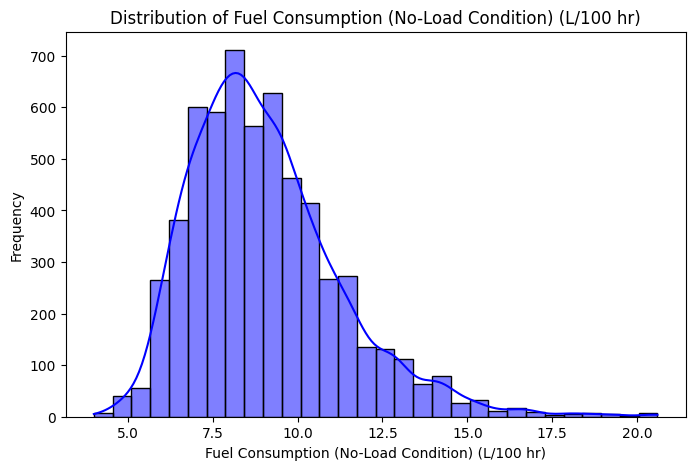

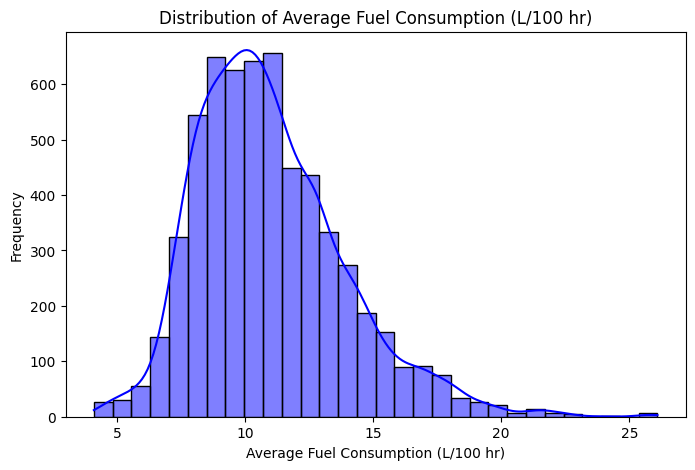

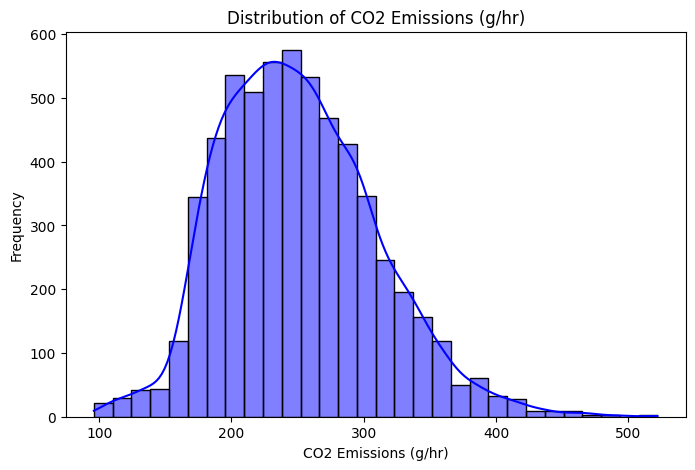

In [ ]:
# Visualize distributions of key numerical features
numerical_features = [
    'Engine Capacity (L)', 'Fuel Consumption (Load Condition) (L/100 hr)',
    'Fuel Consumption (No-Load Condition) (L/100 hr)', 'Average Fuel Consumption (L/100 hr)',
    'CO2 Emissions (g/hr)'
]

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

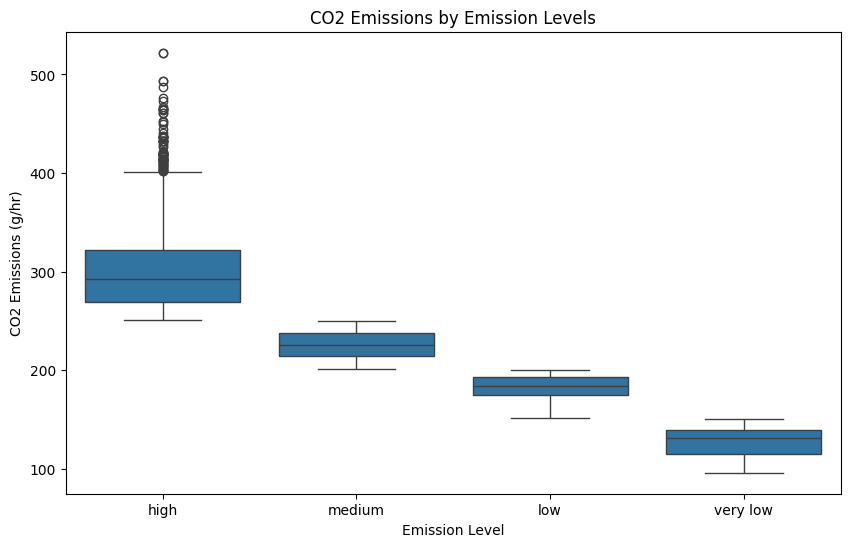

In [ ]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='CO2 Emissions Level', y='CO2 Emissions (g/hr)', data=train_df)
plt.title("CO2 Emissions by Emission Levels")
plt.xlabel("Emission Level")
plt.ylabel("CO2 Emissions (g/hr)")
plt.show()

In this section, we will prepare the dataset for modeling by performing the following steps:
1. **Remove Duplicate Data**:
   - Identify and remove duplicate rows from the dataset to ensure clean and unique data for training.
2. **Feature Engineering**:
   - Encode categorical variables such as `Manufacturer`, `Machine Model`, and `Machinery Category` using encoding techniques like Label Encoding or One-Hot Encoding to make them suitable for machine learning algorithms.
3. **Feature Scaling**:
   - Standardize or normalize numerical features such as `Engine Capacity`, `Fuel Consumption (Load Condition)`, and others to ensure that all features contribute equally to the model.
4. **Train-Test Split**:
   - Divide the training dataset into a training set and validation set for cross-validation and hyperparameter tuning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy of the original training dataset for modification
processed_train_df = train_df.copy()

In [ ]:
# Step 1: Remove Duplicate Data
print("Number of duplicate rows before removal:", processed_train_df.duplicated().sum())
processed_train_df = processed_train_df.drop_duplicates()
print("Number of duplicate rows after removal:", processed_train_df.duplicated().sum())

Number of duplicate rows before removal: 1070
Number of duplicate rows after removal: 0


In [ ]:
# Step 2: Encode categorical features
categorical_features = ['Manufacturer', 'Machine Model', 'Machinery Category', 'Transmission Type', 'Fuel Category']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    processed_train_df[feature] = le.fit_transform(processed_train_df[feature])
    label_encoders[feature] = le  # Save the encoder for future use


In [ ]:
# Step 3: Feature Scaling
numerical_features = [
    'Engine Capacity (L)', 'Fuel Consumption (Load Condition) (L/100 hr)',
    'Fuel Consumption (No-Load Condition) (L/100 hr)', 'Average Fuel Consumption (L/100 hr)',
    'Average Fuel Efficiency (hrg)', 'CO2 Emissions (g/hr)'
]

scaler = StandardScaler()
processed_train_df[numerical_features] = scaler.fit_transform(processed_train_df[numerical_features])


In [ ]:
# Step 4: Train-Test Split
X = processed_train_df.drop(columns=['CO2 Emissions Level', 'CO2 Emissions (g/hr)'])  # Features
y = processed_train_df['CO2 Emissions Level']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Display the processed data structure
print("Processed Training Data Preview:")
print(processed_train_df.head())
print("\nTraining and Validation Set Shapes:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_val: {y_val.shape}")


Processed Training Data Preview:
   Manufacturer  Machine Model  Machinery Category  Engine Capacity (L)  \
0            28            123                   6             0.612913   
1             4             39                   2            -0.855334   
2            32            577                   9             0.319263   
3            39            874                  13             0.612913   
4            31            411                   4            -0.488272   

   Engine Cylinders  Transmission Type  Fuel Category  \
0                 8                  6              4   
1                 4                  5              4   
2                 6                  4              4   
3                 6                 14              3   
4                 4                  2              3   

   Fuel Consumption (Load Condition) (L/100 hr)  \
0                                      0.950798   
1                                     -0.566358   
2                   

**SOFTMAX REGRESSION**

In this step, we will implement **Softmax Regression** using `LogisticRegression` from `sklearn`. This model uses ℓ2 regularization by default. We will:
1. Perform hyperparameter tuning for the regularization strength parameter `C` using GridSearchCV.
2. Analyze the impact of increasing `C` on the model's performance.
3. Evaluate the model using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# Define the parameter grid for C (regularization strength)
param_grid = {'C': np.logspace(-3, 3, 7)}

# Perform GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_logreg = grid_search.best_estimator_

# Evaluate the model on the validation set
y_pred = best_logreg.predict(X_val)
y_pred_proba = best_logreg.predict_proba(X_val)

# Classification Report
print("Classification Report for Softmax Regression:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(pd.get_dummies(y_val), y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Impact of increasing C
print("Best C from GridSearch:", grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

KeyboardInterrupt: 

**Decision Tree**

In this step, we will implement a **Decision Tree Classifier**. The key objectives are:
1. Tune hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` using GridSearchCV to improve performance.
2. Analyze the impact of hyperparameter tuning on overfitting and model performance.
3. Evaluate the model using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(X_train, y_train)

# Best model from GridSearch
best_decision_tree = grid_search_dt.best_estimator_

# Evaluate the model on the validation set
y_pred_dt = best_decision_tree.predict(X_val)

# Classification Report
print("Classification Report for Decision Tree:")
print(classification_report(y_val, y_pred_dt))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_dt))

# Feature Importance
print("Feature Importances:")
print(best_decision_tree.feature_importances_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classification Report for Decision Tree:
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       453
         low       0.98      0.99      0.99       188
      medium       0.98      0.98      0.98       307
    very low       1.00      0.95      0.97        20

    accuracy                           0.99       968
   macro avg       0.99      0.98      0.98       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
[[448   0   5   0]
 [  0 187   1   0]
 [  4   3 300   0]
 [  0   1   0  19]]
Feature Importances:
[0.00640172 0.005772   0.00183244 0.00802185 0.         0.00103828
 0.04030248 0.05827351 0.00513938 0.86127666 0.01194169]


**Random Forest**

In this step, we will implement a **Random Forest Classifier**, focusing on the following objectives:
1. Tune ensemble-specific hyperparameters like `n_estimators` and `max_features` using GridSearchCV.
2. Perform feature importance analysis to identify key predictors.
3. Evaluate the model using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state=42, oob_score=True)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, None]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best model from GridSearch
best_random_forest = grid_search_rf.best_estimator_

# Evaluate the model on the validation set
y_pred_rf = best_random_forest.predict(X_val)

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

# Out-of-Bag Score
print(f"Out-of-Bag Score: {best_random_forest.oob_score_}")

# Feature Importance
print("Feature Importances:")
print(best_random_forest.feature_importances_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classification Report for Random Forest:
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       453
         low       0.98      0.99      0.98       188
      medium       0.98      0.98      0.98       307
    very low       1.00      0.95      0.97        20

    accuracy                           0.99       968
   macro avg       0.99      0.98      0.98       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
[[449   0   4   0]
 [  0 186   2   0]
 [  4   3 300   0]
 [  0   1   0  19]]
Out-of-Bag Score: 0.9782945736434109
Feature Importances:
[6.81309074e-03 6.78163602e-03 4.88373654e-03 7.05223657e-03
 5.71251430e-04 4.22013572e-03 3.96120404e-02 3.58782558e-02
 9.05919540e-03 7.53192745e-01 1.31935676e-01]


**AdaBoost**

In this step, we will implement an **AdaBoost Classifier**, focusing on the following objectives:
1. Tune hyperparameters such as `n_estimators` and `learning_rate` using GridSearchCV.
2. Analyze the impact of these hyperparameters on the model's performance.
3. Evaluate the model using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV
grid_search_ab = GridSearchCV(adaboost, param_grid_ab, cv=5, scoring='accuracy', verbose=1)
grid_search_ab.fit(X_train, y_train)

# Best model from GridSearch
best_adaboost = grid_search_ab.best_estimator_

# Evaluate the model on the validation set
y_pred_ab = best_adaboost.predict(X_val)

# Classification Report
print("Classification Report for AdaBoost:")
print(classification_report(y_val, y_pred_ab))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ab))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classification Report for AdaBoost:
              precision    recall  f1-score   support

        high       0.98      0.97      0.97       453
         low       0.87      0.95      0.91       188
      medium       0.93      0.94      0.94       307
    very low       0.00      0.00      0.00        20

    accuracy                           0.94       968
   macro avg       0.70      0.72      0.71       968
weighted avg       0.92      0.94      0.93       968

Confusion Matrix:
[[441   0  12   0]
 [  0 179   9   0]
 [ 10   7 290   0]
 [  1  19   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Soft Voting Classifier**

In this step, we will implement a **Soft Voting Classifier**. The key objectives are:
1. Combine previously trained models (e.g., Logistic Regression, Random Forest, and AdaBoost) that support soft voting.
2. Evaluate the ensemble's performance using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
3. Compare the ensemble's performance with individual classifiers.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the Soft Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', best_logreg),
        ('random_forest', best_random_forest),
        ('adaboost', best_adaboost)
    ],
    voting='soft'
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_vc = voting_clf.predict(X_val)

# Classification Report
print("Classification Report for Soft Voting Classifier:")
print(classification_report(y_val, y_pred_vc))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_vc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Soft Voting Classifier:
              precision    recall  f1-score   support

        high       0.97      0.99      0.98       453
         low       0.97      0.97      0.97       188
      medium       0.97      0.93      0.95       307
    very low       1.00      0.95      0.97        20

    accuracy                           0.97       968
   macro avg       0.98      0.96      0.97       968
weighted avg       0.97      0.97      0.97       968

Confusion Matrix:
[[449   0   4   0]
 [  0 182   6   0]
 [ 14   6 287   0]
 [  1   0   0  19]]


**Stacking Classifier**

In this step, we will implement a **Stacking Classifier**, focusing on:
1. Combining the predictions of previously trained models (Logistic Regression, Random Forest, and AdaBoost).
2. Using a meta-model (blender) such as Logistic Regression to combine predictions.
3. Evaluating the stacking classifier's performance using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base models
estimators = [
    ('logreg', best_logreg),
    ('random_forest', best_random_forest),
    ('adaboost', best_adaboost)
]

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_sc = stacking_clf.predict(X_val)

# Classification Report
print("Classification Report for Stacking Classifier:")
print(classification_report(y_val, y_pred_sc))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_sc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       453
         low       0.98      0.99      0.98       188
      medium       0.98      0.98      0.98       307
    very low       1.00      0.95      0.97        20

    accuracy                           0.99       968
   macro avg       0.99      0.98      0.98       968
weighted avg       0.99      0.99      0.99       968

Confusion Matrix:
[[449   0   4   0]
 [  0 186   2   0]
 [  4   3 300   0]
 [  0   1   0  19]]


**Multi-Layer Perceptron (MLP)**

In this step, we will train a Multi-Layer Perceptron (MLP) Regressor to predict `CO2 Emissions (g/hr)`. The key objectives are:
1. Optimize hyperparameters including:
   - Number of layers and neurons.
   - Learning rate.
   - Activation functions.
2. Apply early stopping during training to prevent overfitting.
3. Evaluate the model's performance using:
   - Mean Absolute Error (MAE).
   - Root Mean Squared Error (RMSE).
4. Map the predicted continuous values to the closest `CO2 Emissions Level` and evaluate classification metrics.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the MLP Regressor model
mlp = MLPRegressor(max_iter=1000, random_state=42, early_stopping=True)

# Define hyperparameters for tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh']
}

# Ensure data compatibility for GridSearchCV
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

# Perform GridSearchCV
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')

#NEED TO CHANGE HIGH MEDIUM LOW TO NUMERICAL VALUES BROTHER BECAUSE THIS IS NOT WORKING DAYUUUUUUUUUUUUUUUUM
grid_search_mlp.fit(X_train, y_train)

# Best model from GridSearch
best_mlp = grid_search_mlp.best_estimator_

# Evaluate the model on the validation set
y_pred_mlp = best_mlp.predict(X_val)

# Regression Metrics
mae = mean_absolute_error(y_val, y_pred_mlp)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_mlp))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Map predictions to CO2 Emissions Levels
# Assuming CO2 Emissions Level mapping is predefined
def map_to_level(pred):
    # Example threshold mapping (customize as needed)
    if pred < 150: return 'low'
    elif pred < 300: return 'medium'
    else: return 'high'

predicted_levels = [map_to_level(val) for val in y_pred_mlp]
actual_levels = [map_to_level(val) for val in y_val]

# Classification Report
print("Classification Report for Predicted CO2 Emissions Levels:")
print(classification_report(actual_levels, predicted_levels))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: could not convert string to float: 'high'

Final report stuff

In [ ]:
# Compile metrics from all models
import pandas as pd

# Classification metrics
# softmax_metrics = {
#     'Model': 'Softmax Regression',
#     'Accuracy': grid_search.best_score_,
#     'Precision': classification_report(y_val, y_pred, output_dict=True)['weighted avg']['precision'],
#     'Recall': classification_report(y_val, y_pred, output_dict=True)['weighted avg']['recall'],
#     'F1-Score': classification_report(y_val, y_pred, output_dict=True)['weighted avg']['f1-score'],
#     'ROC-AUC': roc_auc
# }

decision_tree_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': grid_search_dt.best_score_,
    'Precision': classification_report(y_val, y_pred_dt, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_val, y_pred_dt, output_dict=True)['weighted avg']['recall'],
    'F1-Score': classification_report(y_val, y_pred_dt, output_dict=True)['weighted avg']['f1-score'],
    'ROC-AUC': None  # Decision trees don't naturally provide probabilities for ROC-AUC
}

random_forest_metrics = {
    'Model': 'Random Forest',
    'Accuracy': grid_search_rf.best_score_,
    'Precision': classification_report(y_val, y_pred_rf, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_val, y_pred_rf, output_dict=True)['weighted avg']['recall'],
    'F1-Score': classification_report(y_val, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
    'ROC-AUC': None
}

adaboost_metrics = {
    'Model': 'AdaBoost',
    'Accuracy': grid_search_ab.best_score_,
    'Precision': classification_report(y_val, y_pred_ab, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_val, y_pred_ab, output_dict=True)['weighted avg']['recall'],
    'F1-Score': classification_report(y_val, y_pred_ab, output_dict=True)['weighted avg']['f1-score'],
    'ROC-AUC': None
}

soft_voting_metrics = {
    'Model': 'Soft Voting Classifier',
    'Accuracy': voting_clf.score(X_val, y_val),
    'Precision': classification_report(y_val, y_pred_vc, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_val, y_pred_vc, output_dict=True)['weighted avg']['recall'],
    'F1-Score': classification_report(y_val, y_pred_vc, output_dict=True)['weighted avg']['f1-score'],
    'ROC-AUC': None
}

stacking_metrics = {
    'Model': 'Stacking Classifier',
    'Accuracy': stacking_clf.score(X_val, y_val),
    'Precision': classification_report(y_val, y_pred_sc, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_val, y_pred_sc, output_dict=True)['weighted avg']['recall'],
    'F1-Score': classification_report(y_val, y_pred_sc, output_dict=True)['weighted avg']['f1-score'],
    'ROC-AUC': None
}

# # Regression metrics
# mlp_metrics = {
#     'Model': 'MLP Regressor',
#     'MAE': mae,
#     'RMSE': rmse,
#     'R-Squared': best_mlp.score(X_val, y_val)
# }

# Combine all results into a DataFrame
classification_results = pd.DataFrame([#softmax_metrics,
                                       decision_tree_metrics, random_forest_metrics, adaboost_metrics, soft_voting_metrics, stacking_metrics])
# regression_results = pd.DataFrame([mlp_metrics])

# Display results
print("Classification Results:")
print(classification_results)
# print("\nRegression Results:")
# print(regression_results)

# Final Report Summary
final_report = f'''
### Final Report

#### Exploratory Data Analysis (EDA)
- **Key Insights:**
  - {numerical_features} were visualized for distribution.
  - CO2 Emissions were analyzed by emission levels.

#### Hyperparameter Tuning Results
- Softmax Regression: Best C = {'grid_search.best_params_'}
- Decision Tree: Best Parameters = {grid_search_dt.best_params_}
- Random Forest: Best Parameters = {grid_search_rf.best_params_}
- AdaBoost: Best Parameters = {grid_search_ab.best_params_}
- MLP: Best Parameters = {'grid_search_mlp.best_params_'}

#### Model Performance
##### Classification
{classification_results.to_string(index=False)}

##### Regression
{'regression_results.to_string(index=False)'}

#### Conclusion
- Best Classification Model: {classification_results.loc[classification_results['Accuracy'].idxmax(), 'Model']}
- Best Regression Model: MLP Regressor with RMSE = {'rmse:.2f'}
'''

print(final_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Results:
                    Model  Accuracy  Precision    Recall  F1-Score ROC-AUC
0           Decision Tree  0.973127   0.985573  0.985537  0.985528    None
1           Random Forest  0.975711   0.985560  0.985537  0.985529    None
2                AdaBoost  0.926098   0.921903  0.940083  0.930648    None
3  Soft Voting Classifier  0.967975   0.967995  0.967975  0.967823    None
4     Stacking Classifier  0.985537   0.985560  0.985537  0.985529    None

### Final Report

#### Exploratory Data Analysis (EDA)
- **Key Insights:**
  - ['Engine Capacity (L)', 'Fuel Consumption (Load Condition) (L/100 hr)', 'Fuel Consumption (No-Load Condition) (L/100 hr)', 'Average Fuel Consumption (L/100 hr)', 'Average Fuel Efficiency (hrg)', 'CO2 Emissions (g/hr)'] were visualized for distribution.
  - CO2 Emissions were analyzed by emission levels.

#### Hyperparameter Tuning Results
- Softmax Regression: Best C = grid_search.best_params_
- Decision Tree: Best Parameters = {'max_depth': 